
# Project: Machine Learning Classification on the IRIS Dataset
Description:
This project focuses on building a machine learning classification model to predict the species of Iris flowers (Setosa, Versicolor, Virginica) based on their sepal and petal dimensions. The key objectives include data exploration, feature engineering, model training, evaluation, and saving the trained model for future predictions. K-Nearest Neighbors (KNN) is used as the primary classification algorithm.

**1. Data Import and Initial Setup**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df_0 = pd.read_csv('iris.csv')  # Load the dataset
df_1 = df_0.drop('Id', axis=1).copy()  # Drop the ID column for analysis


**2. Data Exploration**


In [4]:
df_1.head()
df_1.isnull().sum()  # Check for missing values
df_1.describe().T  # Summary statistics
df_1.info()  # Data types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**3. Label Encoding**

In [5]:
label_encoder = LabelEncoder()
df_1['SpeciesEncoded'] = label_encoder.fit_transform(df_1['Species'])


**4. Exploratory Visualization**

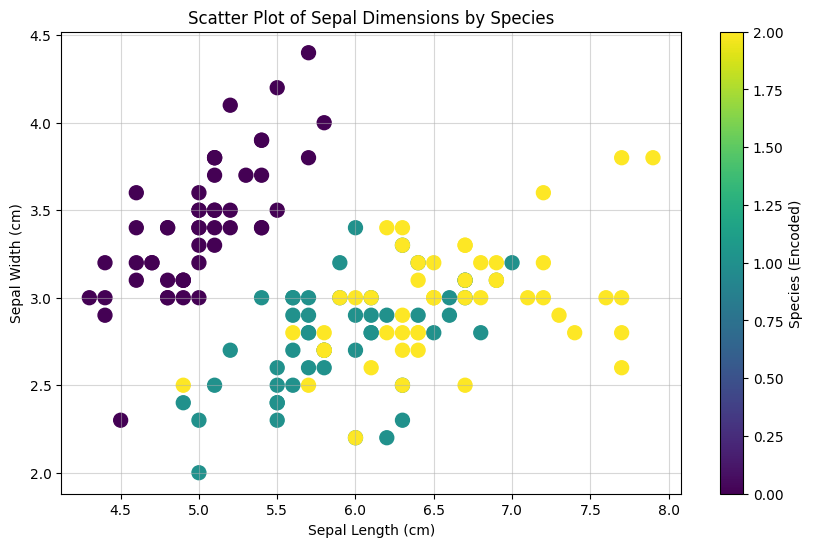

In [6]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_1['SepalLengthCm'], 
    df_1['SepalWidthCm'], 
    c=df_1['SpeciesEncoded'], 
    cmap='viridis', 
    s=100
)
plt.colorbar(scatter, label='Species (Encoded)')
plt.title('Scatter Plot of Sepal Dimensions by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.grid(alpha=0.5)
plt.show()


**5. Model Training**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = df_1[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df_1['SpeciesEncoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)


KNeighborsClassifier()

**6. Model Evaluation**

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model_KNN.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**7. Saving the Model**

In [ ]:
import joblib

joblib.dump(model_KNN, 'model_KNN.pkl')
print("Model saved as 'model_KNN.pkl'")


**8. Predictions on New Data**

In [10]:
new_data = pd.DataFrame({
    'SepalLengthCm': [5.9, 6.0],
    'SepalWidthCm': [3.0, 3.4],
    'PetalLengthCm': [4.2, 5.1],
    'PetalWidthCm': [1.5, 1.8]
})

predictions = model_KNN.predict(new_data)
print("Predicted Classes:", predictions)


Predicted Classes: [1 2]
